In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('stock-data.csv')

# Extract the 'open' column (assuming it is the 4th column)
open_value = dataset.iloc[:, 3]

# Remove rows where 'open_value' is missing
open_value = open_value.dropna()

# Convert into a column vector
open_value = open_value.values.reshape(-1, 1)

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[3.2912271 ]
 [3.30460596]
 [3.30460596]
 [3.30460596]
 [3.38488007]]
(11174, 1)


In [2]:
# Remove the first 4000 values
open_value = open_value[4000:]

# Print the first 5 values and the shape
print(open_value[:5])
print(open_value.shape)

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
(7174, 1)


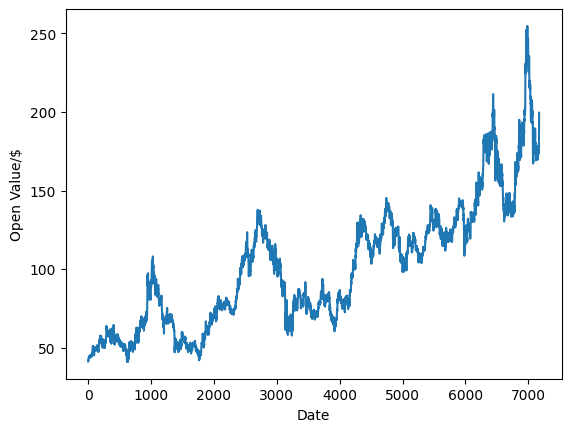

In [3]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[41.25 ]
 [41.875]
 [42.125]
 [41.875]
 [42.375]]
[[0.00146142]
 [0.00438427]
 [0.00555341]
 [0.00438427]
 [0.00672255]]


In [5]:
data = []
target = []

for i in range(100, open_value.shape[0] - 5):  # Subtract 5 to ensure we have enough data for target
    data.append(scaled_open_value[i - 100:i])  # 100 previous values
    target.append(scaled_open_value[i:i + 5])  # The next 5 values

In [6]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(7069, 100, 1)
(7069, 5, 1)


In [7]:
data=data_np
target=target_np

In [8]:
train_data=data[:6000]
train_target=target[:6000]

test_data=data[6000:]
test_target=target[6000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(6000, 100, 1)
(1069, 100, 1)
(6000, 5, 1)
(1069, 5, 1)


In [9]:
!pip install tensorflow

In [10]:
!pip install keras

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Activation

model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=126, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

# Adding Conv1D layers
model.add(Conv1D(filters=128, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.5))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(5))

# Compile the model
model.compile(loss='mse', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 126)            │          64,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 126)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 96)             │          85,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 96)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 98, 128)             │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 47, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           7,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,141 (856.02 KB)

 Trainable params: 219,141 (856.02 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(train_data,train_target,epochs=100,validation_data=(test_data,test_target))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 56s 272ms/step - loss: 0.0092 - val_loss: 0.0179
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 259ms/step - loss: 0.0016 - val_loss: 0.0128
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - loss: 0.0013 - val_loss: 0.0225
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 277ms/step - loss: 0.0010 - val_loss: 0.0161
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 259ms/step - loss: 9.3389e-04 - val_loss: 0.0088
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 50s 266ms/step - loss: 8.4098e-04 - val_loss: 0.0185
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - loss: 7.7315e-04 - val_loss: 0.0158
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 258ms/step - loss: 7.1645e-04 - val_loss: 0.0168
Epoch 9/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 50s 264ms/step - loss: 8.4475e-04 - val_loss: 0.0101
Epoch 10/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - loss: 6.3294e-04 - val_loss: 0.0147
Epoch 11/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 274ms/step - loss: 6.7153e-04

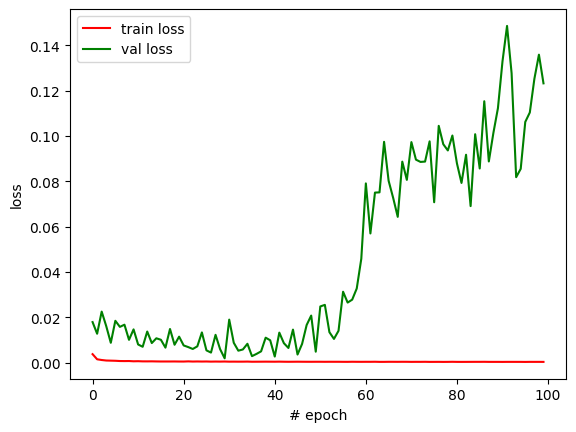

In [14]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict the values using the trained model
predictions = model.predict(test_data)

# Flatten the predictions and test_target to 1D arrays
predictions = predictions.reshape(-1)
test_target = test_target.reshape(-1)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f"RMSE: {rmse}")

# 2. Directional Accuracy
# Compute the direction of actual and predicted values
actual_direction = np.sign(np.diff(test_target))  # Direction of actual values
predicted_direction = np.sign(np.diff(predictions))  # Direction of predicted values

# Directional accuracy is the percentage of times the predicted direction matches the actual direction
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100
print(f"Directional Accuracy: {directional_accuracy}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step
RMSE: 0.35094147271900916
Directional Accuracy: 48.91467065868264%
